# Check .nii.gz File

In [10]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os
from ipywidgets import interact, IntSlider

In [11]:
# 1. DEFINE PATH
# DATA_PATH = "/home/minsukc/MRI2CT/data/1ABB116_3x3x3_resampled/ct_resampled.nii.gz"
# DATA_PATH = "/scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/AB/1ABB116/ct.nii.gz"
# DATA_PATH = "/scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/TH/1THA001/ct.nii.gz"
DATA_PATH = "/scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/HN/1HNA001/ct.nii.gz"

if not os.path.exists(DATA_PATH):
    print(f"❌ ERROR: File not found at: {DATA_PATH}")
else:
    print(f"✅ SUCCESS: File found at {DATA_PATH}")

✅ SUCCESS: File found at /scratch/jjparkcv_root/jjparkcv98/minsukc/SynthRAD2025/Task1/HN/1HNA001/ct.nii.gz


In [12]:
# Load the image
image = sitk.ReadImage(DATA_PATH)

# Get the raw numpy array
# NOTE: SimpleITK image is (x, y, z), but numpy array is (z, y, x)
array = sitk.GetArrayFromImage(image)

print("--- 📋 Volume Metadata ---")
print(f"Image Size (x, y, z): {image.GetSize()}")
print(f"Numpy Shape (z, y, x): {array.shape}")
print(f"Spacing (mm):         {image.GetSpacing()}")
print(f"Origin:               {image.GetOrigin()}")
print(f"Direction (Cosine):   {image.GetDirection()}")
print(f"Pixel Type:           {image.GetPixelIDTypeAsString()}")

print("\n--- 📊 Intensity Statistics ---")
print(f"Min Intensity: {np.min(array)}")
print(f"Max Intensity: {np.max(array)}")
print(f"Mean:          {np.mean(array):.2f}")
print(f"Std Dev:       {np.std(array):.2f}")

--- 📋 Volume Metadata ---
Image Size (x, y, z): (533, 390, 118)
Numpy Shape (z, y, x): (118, 390, 533)
Spacing (mm):         (1.0, 1.0, 3.0)
Origin:               (-261.1260070800781, -162.39999389648438, -168.0)
Direction (Cosine):   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type:           16-bit signed integer

--- 📊 Intensity Statistics ---
Min Intensity: -1024
Max Intensity: 3071
Mean:          -839.20
Std Dev:       385.23


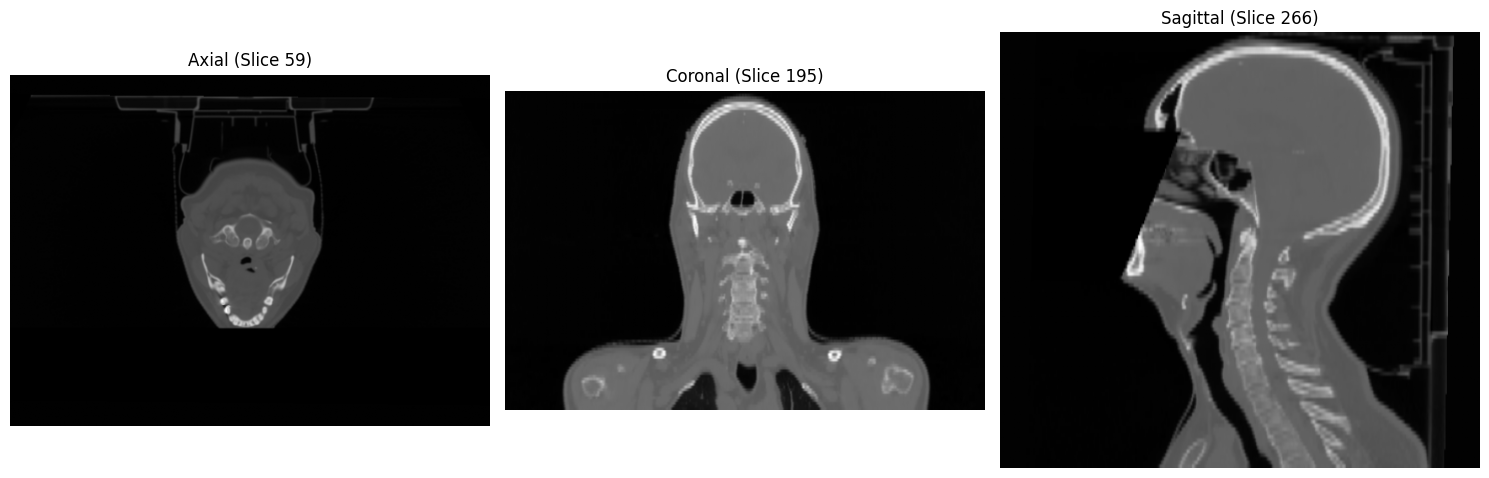

In [13]:
# Calculate middle slices
z_mid = array.shape[0] // 2
y_mid = array.shape[1] // 2
x_mid = array.shape[2] // 2

# Aspect ratios for plotting (to handle non-square pixels)
spacing = image.GetSpacing() # (x, y, z)
aspect_ax = spacing[1] / spacing[0] 
aspect_sag = spacing[2] / spacing[1]
aspect_cor = spacing[2] / spacing[0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial (Top-down)
axes[0].imshow(array[z_mid, :, :], cmap='gray', origin='lower', aspect=aspect_ax)
axes[0].set_title(f'Axial (Slice {z_mid})')
axes[0].axis('off')

# Coronal (Front-back) -> Slicing Y
# We flip vertically because numpy origin is top-left, medical is bottom-left
axes[1].imshow(np.flipud(array[:, y_mid, :]), cmap='gray', aspect=aspect_cor)
axes[1].set_title(f'Coronal (Slice {y_mid})')
axes[1].axis('off')

# Sagittal (Side-side) -> Slicing X
axes[2].imshow(np.flipud(array[:, :, x_mid]), cmap='gray', aspect=aspect_sag)
axes[2].set_title(f'Sagittal (Slice {x_mid})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

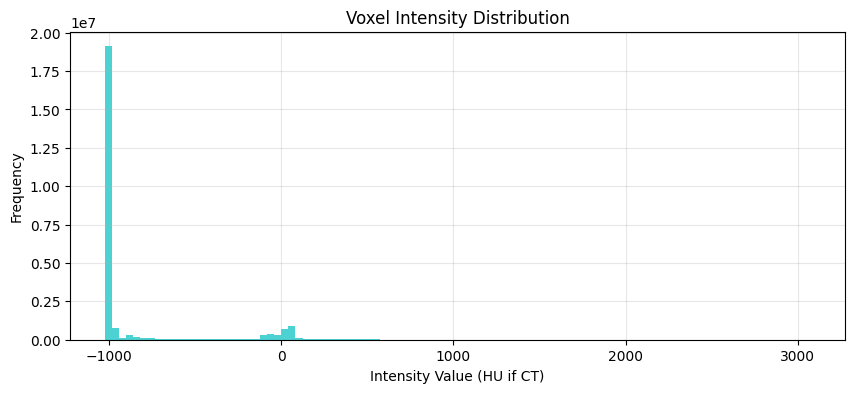

In [14]:
plt.figure(figsize=(10, 4))
plt.hist(array.flatten(), bins=100, color='c', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity Value (HU if CT)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
def explore_slices(slice_idx):
    plt.figure(figsize=(8, 8))
    # Display Axial View
    plt.imshow(array[slice_idx, :, :], cmap='gray', origin='lower')
    plt.title(f"Axial Slice: {slice_idx}")
    plt.axis('off')
    plt.show()

interact(
    explore_slices, 
    slice_idx=IntSlider(
        min=0, 
        max=array.shape[0]-1, 
        step=1, 
        value=array.shape[0]//2,
        description='Z-Slice:'
    )
);

interactive(children=(IntSlider(value=59, description='Z-Slice:', max=117), Output()), _dom_classes=('widget-i…

# Check Segmentation

In [16]:
import matplotlib.pyplot as plt
import os
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

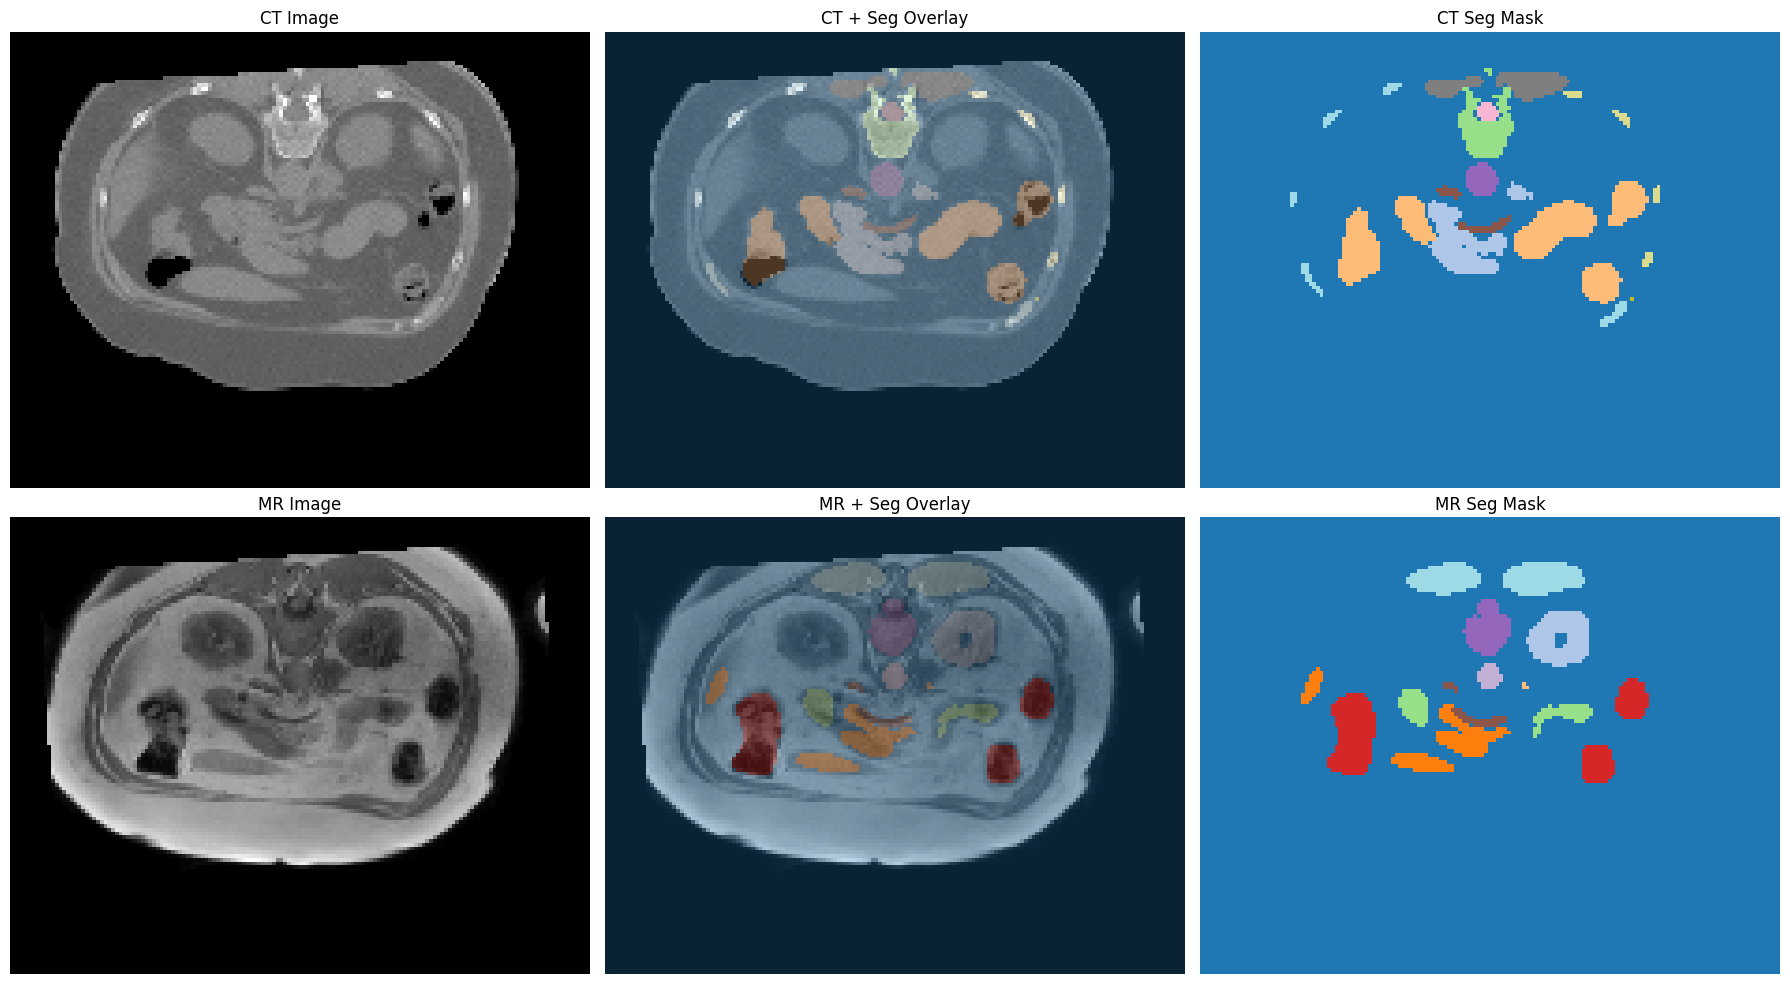

In [17]:
ct_path = os.path.join(DATA_ROOT, "ct_resampled.nii.gz")
mr_path = os.path.join(DATA_ROOT, "mr_resampled.nii.gz")
ct_seg_path = os.path.join(DATA_ROOT, "ct_seg.nii.gz")
mr_seg_path = os.path.join(DATA_ROOT, "mr_seg.nii.gz")

ct_data = nib.load(ct_path).get_fdata()
ct_seg = nib.load(ct_seg_path).get_fdata()
mr_data = nib.load(mr_path).get_fdata()
mr_seg = nib.load(mr_seg_path).get_fdata()

# Normalize for display
ct_disp = np.clip(ct_data, -450, 450)
ct_disp = (ct_disp - ct_disp.min()) / (ct_disp.max() - ct_disp.min() + 1e-8)
mr_disp = (mr_data - mr_data.min()) / (mr_data.max() - mr_data.min() + 1e-8)

# Pick middle slice
sliceidx = ct_data.shape[2] // 2

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# CT Row
axs[0,0].imshow(np.rot90(ct_disp[:, :, sliceidx]), cmap="gray")
axs[0,0].set_title("CT Image")
axs[0,1].imshow(np.rot90(ct_disp[:, :, sliceidx]), cmap="gray")
axs[0,1].imshow(np.rot90(ct_seg[:, :, sliceidx]), cmap="tab20", alpha=0.3)
axs[0,1].set_title("CT + Seg Overlay")
axs[0,2].imshow(np.rot90(ct_seg[:, :, sliceidx]), cmap="tab20")
axs[0,2].set_title("CT Seg Mask")

# MR Row
axs[1,0].imshow(np.rot90(mr_disp[:, :, sliceidx]), cmap="gray")
axs[1,0].set_title("MR Image")
axs[1,1].imshow(np.rot90(mr_disp[:, :, sliceidx]), cmap="gray")
axs[1,1].imshow(np.rot90(mr_seg[:, :, sliceidx]), cmap="tab20", alpha=0.3)
axs[1,1].set_title("MR + Seg Overlay")
axs[1,2].imshow(np.rot90(mr_seg[:, :, sliceidx]), cmap="tab20")
axs[1,2].set_title("MR Seg Mask")

for ax in axs.flatten(): ax.axis('off')

plt.tight_layout()
plt.show

# Check Registration

In [4]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from ipywidgets import interact, IntSlider
import os

# --- 1. Helper Functions ---
def create_random_colormap(num_classes=256, seed=42):
    np.random.seed(seed)
    colors = np.random.rand(num_classes + 1, 4)
    colors[:, 3] = 1.0
    colors[0, :] = [0, 0, 0, 0] # Transparent background
    return ListedColormap(colors)

def create_binary_colormap(color='red', alpha=0.5):
    c = [1, 0, 0, alpha] if color == 'red' else [0, 1, 0, alpha]
    cmap = np.zeros((2, 4))
    cmap[0, :] = [0, 0, 0, 0]
    cmap[1, :] = c
    return ListedColormap(cmap)

def normalize_slice(vol_slice):
    s = vol_slice.astype(np.float32)
    denom = s.max() - s.min()
    if denom > 0:
        return (s - s.min()) / denom
    return s

In [5]:
def visualize_registration(fix, mov, wrp, 
                           fix_seg, mov_seg, wrp_seg, disp,
                           slice_idx=None):
    
    # Default to middle slice if none provided
    if slice_idx is None:
        slice_idx = fix.shape[2] // 2
        
    # Helper to get specific slice & rotate for display
    def get_sl(vol): return np.rot90(vol[:, :, slice_idx])

    # 1. Prepare Data Slices
    f_sl = get_sl(fix)
    m_sl = get_sl(mov)
    w_sl = get_sl(wrp)
    
    fs_sl = get_sl(fix_seg)
    ms_sl = get_sl(mov_seg)
    ws_sl = get_sl(wrp_seg)

    # Calculate Disp Norm
    disp_vol = np.linalg.norm(disp, axis=-1)
    d_sl = get_sl(disp_vol)
    
    # 2. Setup Colormaps
    max_label = max(fix_seg.max(), mov_seg.max(), wrp_seg.max())
    seg_cmap = create_random_colormap(int(max_label))
    red_cmap = create_binary_colormap('red', 0.6)
    green_cmap = create_binary_colormap('green', 0.6)
    mag_cmap = 'jet'

    # 3. Plotting (3 Rows x 4 Columns)
    fig, axes = plt.subplots(3, 4, figsize=(20, 16))
    plt.subplots_adjust(hspace=0.25, wspace=0.1)

    # --- ROW 1: Intensity Inputs & Result ---
    axes[0,0].imshow(normalize_slice(f_sl), cmap='gray', vmin=0, vmax=1)
    axes[0,0].set_title("Fixed (CT)")
    
    axes[0,1].imshow(normalize_slice(m_sl), cmap='gray', vmin=0, vmax=1)
    axes[0,1].set_title("Moving (MRI)")
    
    axes[0,2].imshow(normalize_slice(w_sl), cmap='gray', vmin=0, vmax=1)
    axes[0,2].set_title("Warped (Reg. MRI)")

    axes[0,3].axis('off') # EMPTY

    # --- ROW 2: Overlays & Displacement ---
    # Pre-Registration Overlay
    rgb_pre = np.zeros((*f_sl.shape, 3))
    rgb_pre[..., 0] = normalize_slice(f_sl) # R = CT
    rgb_pre[..., 1] = normalize_slice(m_sl) # G = Moving
    axes[1,0].imshow(rgb_pre)
    axes[1,0].set_title("Pre-Reg (R=CT, G=MR)")

    # Post-Registration Overlay
    rgb_post = np.zeros((*f_sl.shape, 3))
    rgb_post[..., 0] = normalize_slice(f_sl) # R = CT
    rgb_post[..., 1] = normalize_slice(w_sl) # G = Warped
    axes[1,1].imshow(rgb_post)
    axes[1,1].set_title("Post-Reg (R=CT, G=Warped MR)")

    # Displacement with Colorbar
    im_d = axes[1,2].imshow(d_sl, cmap=mag_cmap)
    axes[1,2].set_title("Disp. Magnitude")
    cbar = plt.colorbar(im_d, ax=axes[1,2], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

    axes[1,3].axis('off') # EMPTY

    # --- ROW 3: Segmentation ---
    axes[2,0].imshow(fs_sl, cmap=seg_cmap, interpolation='nearest', vmin=0, vmax=max_label)
    axes[2,0].set_title("Fixed Mask")

    axes[2,1].imshow(ms_sl, cmap=seg_cmap, interpolation='nearest', vmin=0, vmax=max_label)
    axes[2,1].set_title("Moving Mask")

    axes[2,2].imshow(ws_sl, cmap=seg_cmap, interpolation='nearest', vmin=0, vmax=max_label)
    axes[2,2].set_title("Warped Mask")

    # Mask Overlay
    f_bin = (fs_sl > 0).astype(int)
    w_bin = (ws_sl > 0).astype(int)
    
    axes[2,3].imshow(normalize_slice(f_sl), cmap='gray', alpha=0.5) 
    axes[2,3].imshow(f_bin, cmap=red_cmap, interpolation='nearest', vmin=0, vmax=1)
    axes[2,3].imshow(w_bin, cmap=green_cmap, interpolation='nearest', vmin=0, vmax=1)
    axes[2,3].set_title("Mask Overlap (R=Fix, G=Warp)")

    # Cleanup axes
    for r in range(3):
        for c in range(4):
            # Turn off axis lines for everything except maybe the plot frames
            if (r, c) == (1, 2): # Displacement
                axes[r,c].axis('off') # Keep colorbar, hide axis ticks
            else:
                axes[r,c].axis('off')

    plt.show()

In [6]:
# --- 3. Interactive Run ---
DATA_ROOT = "/home/minsukc/MRI2CT/data"
# SUBJECT = "1ABA005_3.0x3.0x3.0_resampled"
# SUBJECT = "1THA001_3.0x3.0x3.0_resampled"
SUBJECT = "1HNA001_3.0x3.0x3.0_resampled"

data_path = os.path.join(DATA_ROOT, SUBJECT)
fixed_path = os.path.join(data_path, "ct_resampled.nii.gz")
moving_path = os.path.join(data_path, "mr_resampled.nii.gz")
fseg_path = os.path.join(data_path, "ct_seg.nii.gz")
mseg_path = os.path.join(data_path, "mr_seg.nii.gz")
warped_path = os.path.join(data_path, "registration_output", "moved_mr.nii.gz")
wseg_path = os.path.join(data_path, "registration_output", "labels_moved.nii.gz")
disp_path = os.path.join(data_path, "registration_output", "disp.nii.gz")

# To avoid re-loading files on every slider move, load data ONCE outside:
fixed = nib.load(fixed_path).get_fdata()
moving = nib.load(moving_path).get_fdata()
warped = nib.load(warped_path).get_fdata()
fseg = nib.load(fseg_path).get_fdata().astype(np.int32)
mseg = nib.load(mseg_path).get_fdata().astype(np.int32)
wseg = nib.load(wseg_path).get_fdata().astype(np.int32)
disp = nib.load(disp_path).get_fdata().astype(np.int32)

interact(
    lambda z: visualize_registration(fixed, moving, warped, fseg, mseg, wseg, disp, z), 
    z=IntSlider(min=0, max=fixed.shape[2]-1, step=1, value=fixed.shape[2]//2)
)

interactive(children=(IntSlider(value=59, description='z', max=117), Output()), _dom_classes=('widget-interact…

<function __main__.<lambda>(z)>

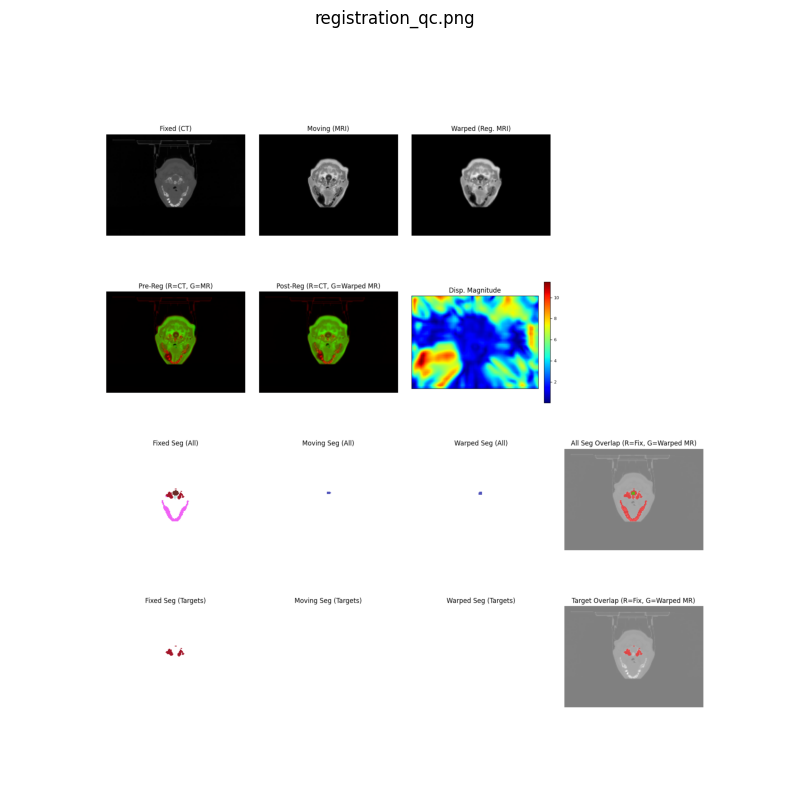

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_png(file_path):
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return
        
    img = mpimg.imread(file_path)
    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(file_path))
    plt.show()

# Usage
png_path = os.path.join(data_path, "registration_output", "registration_qc.png")
view_png(png_path)